
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 72</p>
## <p style="text-align: center;">Due: Tuesday, February 22nd, submitted via Canvas by 11:59 pm</p>
### Cassidy Burden (cab5534), Ryan Meek (rjm3263)

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (20 points)
Use the following code to import the dow_jones dataset.

In [4]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

You will reuse the same dataset that you used in HW1. In this HW, you will add additional second-order polynomial and interaction variables to the features matrix. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{6}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(6,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation on each model. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? What do you observe about the coefficients returned from the ridge and lasso models? (5pts)


3) What are the top 10 most important features for the lasso and ridge models for the hyperparameters that got the best MSE? (2pts)


4) SKLearn can perform this cross validation for us and choose the best regularization hyper-parameter. It will automatically determine the range of $\lambda$ s to search over. Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

    Report the best $\lambda$ based on cross validation. (3 pts)
    
5) 
    i) Run Ridge, lasso with the best hyperparameters and report the MSE on test data. 
    ii) Run OLS on the training data with all the features and then with the features selected through lasso (features with non zero weights). Report the MSE on test data. (5 pts)

## Answer

### 1

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

alphas =  10**np.linspace(6,-2,100)*0.5
kf = KFold(n_splits=5, random_state=20)

lasso_max_alpha = (0, np.inf)
ridge_max_alpha = (0, np.inf)

for alpha in alphas:
    lasso_error = 0
    ridge_error = 0
    
    for train_index, test_index in kf.split(X_train):
        X_kf_train, X_kf_test = X_train[train_index], X_train[test_index]
        y_kf_train, y_kf_test = y_train[train_index], y_train[test_index]
        
        lasso = Lasso(alpha)
        ridge = Ridge(alpha)
        
        lasso_fit = lasso.fit(X_kf_train, y_kf_train)
        ridge_fit = ridge.fit(X_kf_train, y_kf_train)
        
        lasso_error += mean_squared_error(lasso_fit.predict(X_kf_test), y_kf_test)
        ridge_error += mean_squared_error(ridge_fit.predict(X_kf_test), y_kf_test)
    
    lasso_error /= 5
    ridge_error /= 5
        
    if (lasso_error < lasso_max_alpha[1]):
        lasso_max_alpha = (alpha, lasso_error)
    if (ridge_error < ridge_max_alpha[1]):
        ridge_max_alpha = (alpha, ridge_error)

print("Lasso best alpha is ", lasso_max_alpha[0], " with MSE of ", lasso_max_alpha[1])
print("Ridge best alpha is ", ridge_max_alpha[0], " with MSE of ", ridge_max_alpha[1])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 2

In [ ]:
found_lasso_coefs = []
found_ridge_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha)
    ridge = Ridge(alpha)
    
    lasso_fit = lasso.fit(X_train, y_train)
    ridge_fit = ridge.fit(X_train, y_train)
    
    found_lasso_coefs.append(lasso_fit.coef_)
    found_ridge_coefs.append(ridge_fit.coef_)

In [ ]:
from matplotlib import pyplot

plt.title("Lasso")
for alpha_coefs in np.array(found_lasso_coefs).T:
    plt.ylabel('Coefficient Weight')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.plot(alphas, alpha_coefs)

In [ ]:
plt.title("Ridge")
for alpha_coefs in np.array(found_ridge_coefs).T:
    plt.ylabel('Coefficient Weight')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.plot(alphas, alpha_coefs)

The lasso model prefers using much less terms, while the ridge model prefers small (but not quite zero) coefficients scattered about. At a glance it's much easier to tell which terms are important from the lasso model.
### 3

In [45]:
lasso_best_coef = found_lasso_coefs[int(np.where(alphas==lasso_max_alpha[0])[0])]
ridge_best_coef = found_ridge_coefs[int(np.where(alphas==ridge_max_alpha[0])[0])]

lasso_best_coef_idx = np.argsort(lasso_best_coef)
ridge_best_coef_idx = np.argsort(ridge_best_coef)

lasso_best_features = lasso_best_coef_idx[-10:][::-1]
ridge_best_features = ridge_best_coef_idx[-10:][::-1]

print("Lasso best features: ", lasso_best_features)
print("Ridge best features: ", ridge_best_features)

Lasso best features:  [ 0  8  5 28  1 17  3  6 11 63]
Ridge best features:  [ 8  0  3 46 49 53 16 18 32 34]


### 4

In [46]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv_fit = lasso_cv.fit(X_train, y_train)

print("LassoCV found alpha: ", lasso_cv_fit.alpha_)

LassoCV found alpha:  0.046611216595171215


### 5

In [47]:
from sklearn.linear_model import LinearRegression

lasso = Lasso(lasso_max_alpha[0])
lasso_fit = lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(lasso_fit.predict(X_test), y_test)

lasso = Ridge(ridge_max_alpha[0])
ridge_fit = ridge.fit(X_train, y_train)
ridge_mse = mean_squared_error(ridge_fit.predict(X_test), y_test)

OLS = LinearRegression()
OLS_fit = OLS.fit(X_train, y_train)
OLS_MSE = mean_squared_error(OLS_fit.predict(X_test), y_test)

lasso_best_coef_idx_nonzero = lasso_best_coef.nonzero()[0]
X_train_filtered = X_train[:,lasso_best_coef_idx_nonzero]
X_test_filtered = X_test[:,lasso_best_coef_idx_nonzero]
OLS_lasso_filtered = OLS.fit(X_train_filtered, y_train)
OLS_lasso_filtered_MSE = mean_squared_error(OLS_lasso_filtered.predict(X_test_filtered), y_test)

print("Lasso best alpha is ", lasso_max_alpha[0], " with MSE of ", lasso_mse)
print("Ridge best alpha is ", ridge_max_alpha[0], " with MSE of ", ridge_mse)
print("OLS has MSE of ", OLS_MSE)
print("OLS (Lasso Filtered) has MSE of ", OLS_lasso_filtered_MSE)

Lasso best alpha is  0.008737642000038414  with MSE of  0.15983136817357
Ridge best alpha is  0.005  with MSE of  0.0019317330320313645
OLS has MSE of  0.00025540890208644953
OLS (Lasso Filtered) has MSE of  0.00017816277366227142


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Question 2: Bias-Variance Tradeoff (5 points)

1. Describe the relationship between Ordinary Least Squares and Ridge Regression (the problem analyzed in the previous question) with reference to Bias-Variance trade-off.
3. Which is a higher variance model, kNN with k = 1 or with k = 10?




### 1

Ordinary least squares will have higher variance because the lack of a regularization term will cause the model to try and fit the data exactly. However, this solution can cause problems with overfitting which causes the variance to increase. However, because of this minimization of the errors, the bias for ordinary least squares will be less because the average of our solutions will approach the true value. When a regularization term is included, it is possible we will underfit the curve and cause our bias to increase. 

### 2

k = 1 will have higher variance, the lower radius will cause the answers to vary more greatly. Because we're averaging together less samples, more variance will show in the answer.

# Question 3 - Principal Component Analysis (15 points)

Import the same dataset with the interaction variables as in Q1.

In [17]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

In [19]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X_train matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. How many principal components (N1, N2, N3) are required to explain cumulative variance of 90%, 95%, and 99%, respectively? (6 pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. Fit PCA on X_train and predict on X_test. Compare the test MSE using N1, N2, N3 to using all features from PCA (6 pts)

(d) Compare this to the MSE reported in Q1.For this dataset, would you use PCA/Lasso as a feature elimination technique based on: (3 pts)
i) Interpretability of results
ii) MSE value
iii) Hyperparameter tuning?

## Answer

### a

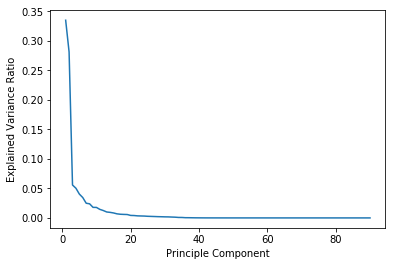

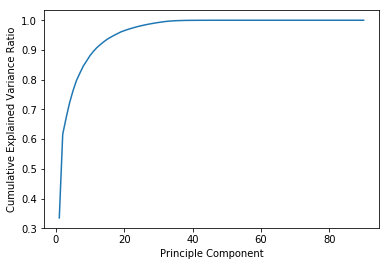

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
#print(pca.explained_variance_ratio_)
cumulative_var_ratio = []
eigen_vector = []
cur_ratio = 0
num = 0
for r in pca.explained_variance_ratio_:
    cur_ratio = cur_ratio + r
    num = num + 1
    cumulative_var_ratio.append(cur_ratio)
    eigen_vector.append(num)


plt.plot(eigen_vector, pca.explained_variance_ratio_)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principle Component")
plt.show()
plt.plot(eigen_vector, cumulative_var_ratio)
plt.ylabel("Cumulative Explained Variance Ratio")
plt.xlabel("Principle Component")
plt.show()

The required principle components for 90%, 95%, 99%, are 12, 18, and 29

### c

In [32]:
pca1 = PCA(n_components=12)
X_train_trans0 = pca1.fit_transform(X_train)
reg = linear_model.LinearRegression()
reg.fit(X_train_trans0, y_train)
X_test_trans0 = pca1.transform(X_test)
predictions_test = reg.predict(X_test_trans0)
print("Mean squared error test N1 components: " , mean_squared_error(y_test, predictions_test))
pca2 = PCA(n_components=18)
X_train_trans1 = pca2.fit_transform(X_train)
reg = linear_model.LinearRegression()
reg.fit(X_train_trans1, y_train)
X_test_trans1 = pca2.transform(X_test)
predictions_test = reg.predict(X_test_trans1)
print("Mean squared error test N2 components: " , mean_squared_error(y_test, predictions_test))
pca3 = PCA(n_components=29)
X_train_trans2 = pca3.fit_transform(X_train)
reg = linear_model.LinearRegression()
reg.fit(X_train_trans2, y_train)
X_test_trans2 = pca3.transform(X_test)
predictions_test = reg.predict(X_test_trans2)
print("Mean squared error test N3 components: " , mean_squared_error(y_test, predictions_test))

Mean squared error test N1 components:  145.46920237766864
Mean squared error test N2 components:  27.725886102496414
Mean squared error test N3 components:  3.1981565974283197


(d) Compare this to the MSE reported in Q1.For this dataset, would you use PCA/Lasso as a feature elimination technique based on: (3 pts) i) Interpretability of results ii) MSE value iii) Hyperparameter tuning?
### d

The MSE for using all components of the PCA analysis is almost equal to the smallest MSE's (lasso filtered OLS: 0.00017816...) reported in Q1. 
### i) 
Interpretability of results is definitely more advantageous in Lasso because the features are simply the features in the original dataset rather than a linear combination of a number of features. 
### ii) 
The MSE value is very similar in the best case for both so I would likely call this about a tie, but depends on the hyperparameters set (number of components in PCA vs alpha in Lasso). 
### iii) 
Tuning the Hyperparameters is much easier in PCA because adding more components will always increase the amount of variance explained, which will likely decrease your MSE as opposed to Lasso there is the delicate balance of overfitting vs underfitting when setting alpha. While PCA can still have the issue of overfitting, it is much easier to set the number of componenets because you know the exact amount of variance explained  

# Question 4 - Sampling (3+2=5pts)

1 . Your firm is conducting a customer survey for a new product. You are tasked with estimating whether the product will be liked or disliked by the entire market. Unfortunately, you cannot reach all the customers. So you randomly sample 400 participants and ask them "Will you like the product" as a question. The responses are evenly split. But you attended a Data Mining course, so you know the estimate is not simply 50%. 
   
What are the lower and upper bounds of probability corresponding to a confidence of 99% ($\alpha = 0.99$)?


2 . Your manager asks you to halve the probability range you reported in part 1. This can be accomplished in two different ways:

    a) Reduce the confidence without going below 90%. 
    OR
    b) Conduct a new survey to acquire more samples. In this case let us assume that the results are again evenly split.
    
Which option is viable? If a), what is the highest confidence you can use? And if b), how many samples do you need?

## Answer

### 1.

$n = (p)(1-p)(\frac{z_{\alpha/2}}{\epsilon})^2$

$400 = (.5)(1-.5)(\frac{2.58}{\epsilon})^2$

$\frac{400}{.5 * .5} = (\frac{2.58}{\epsilon})^2$

$\pm\sqrt{\frac{400}{.5 * .5}} = \frac{2.58}{\epsilon}$

$\frac{2.58}{\pm\sqrt{\frac{400}{.5 * .5}}} = \epsilon$

$\epsilon = \pm 0.0645$

So our confidence interval is +/- 6.45%. So the lower bound of our probability is 43.55% and the upper bound is 56.45% (with 99% confidence).

### 2. a

Recalculating with our interval set to .03225 (changing our confidence):

$400 = (.5)(1-.5)(\frac{z}{.03225})^2$

$z = \pm\sqrt{\frac{400}{.25}} * .03225 = \pm 1.29 \sigma$

$P(\mu - z \leq x \leq \mu + z) = P(.5 - 1.29\sigma \leq x \leq .5 + 1.29\sigma) =  0.80294$

**No option a is not viable.**

### 2. b

Recalculating with our interval set to .03225 (changing our sample size):

$n = (.5)(1-.5)(\frac{2.58}{.03225})^2 = 1600$

We need **1600** samples, which seems reasonable.

# Question 5: Ridge and Lasso Regression (15 points)
The ridge regression problem is characterized by the following loss function:
$$\mathcal{L}(\beta) = ||X \beta - y||_2^2 + \lambda ||\beta||^2_2$$

The ridge regression problem is the case where the penalty term ($\lambda ||\beta||$) uses the squared l-2 norm ($\lambda ||\beta||^2$).

a) Find the closed form solution to the ridge regresion problem
$$\underset{\beta}{\mathrm{argmin}} \mathcal{L}(\beta)$$
where $\mathcal{L}(\beta)$ is the loss function above.

b) Now given the SVD of $X$ as $U \Sigma V^T$, express $X \hat \beta_{ridge}$ in terms of $U$, $V$ and $\Sigma$

c) Explain what the expression for $X \hat \beta_{ridge}$ derived above tells us about how the addition of the regularization term affects the solution. (Hint: think about $\lambda ||\beta||^2$ as a penalty term)

# Answer

### a

$\mathcal{L}(\beta) = ||X \beta - y||_2^2 + \lambda ||\beta||^2_2$

$d[||f(X)||](X) = (\widehat{f(X)})^\intercal \cdot d[X](X) => d[||X \beta - y||](\beta) = \widehat{(X \beta - y)}^\intercal \cdot X$

$d[||X \beta - y||_2^2](\beta) = 2 ||X \beta - y|| * \widehat{(X \beta - y)}^\intercal \cdot X = 2 (X \beta - y)^\intercal X$

$d[\mathcal{L}](\beta) = 2 (X \beta - y)^\intercal X + 2 \lambda \beta^\intercal = (2 (X \beta - y)^\intercal X + 2 \lambda \beta^\intercal)^\intercal = 2 X^\intercal (X \beta - y) + 2 \lambda \beta = 2 X^\intercal X \beta - X^\intercal y + 2 \lambda \beta$

$0 = 2 X^\intercal X \beta - 2 X^\intercal y + 2 \lambda \beta$

$X^\intercal X \beta + \lambda \beta = X^\intercal y$

$(X^\intercal X + \lambda I) \beta = X^\intercal y$

$\widehat{\beta}_{ridge} = (X^\intercal X + \lambda I)^{-1} X^\intercal y$

### b

$$X X^\intercal = (U \Sigma V^\intercal)^\intercal (U \Sigma V^\intercal) = V \Sigma^\intercal U^\intercal U \Sigma V^\intercal$$

$$X X^\intercal = V \Sigma^\intercal \Sigma V^\intercal = V \Sigma^2 V^\intercal$$

$$X \widehat{\beta}_{ridge} = (U \Sigma V^\intercal) (V \Sigma^2 V^\intercal + \lambda I)^{-1} (V \Sigma U^\intercal) Y$$

(The left V becomes and inverse on the right, the right V becomes and inverse transposed on the left)

$$X \widehat{\beta}_{ridge} = U \Sigma (V^\intercal)^{-1} (V \Sigma^2 V^\intercal + \lambda I)^{-1} (V)^{-1} \Sigma U^\intercal Y = U \Sigma (V^\intercal V \Sigma^2 V^\intercal V + \lambda V^\intercal V)^{-1} \Sigma U^\intercal Y$$

$$X \widehat{\beta}_{ridge} = U \Sigma (\Sigma^2 + \lambda I)^{-1} \Sigma U^\intercal Y$$

### c

The inner section can be expressed as:

$$\sum_{i=0}^{n} \frac{d_i^2}{d_i^2 + \lambda}$$

This means as lambda gets bigger the components will be scaled closer to 0. Larger components are less affected by being divided by a constant lambda, especially with the squared term involved.

# Question 6 - Outliers and Huber Loss (12 pts)

In this problem, we will use the same data set from the previous problem set to fit a linear model to the data using a Huber loss function rather than the l-2 norm usually used in OLS. sklearn has a nice API you can use: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor)

Below is a snippet from the previous problem set to help you get started. For this problem, the only independent variable will be the "percent\_change\_price" feature.


In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  953.538042822908
MSE test:  1192.1733687430108


a) Now do the same for the Huber loss function and print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [53]:
# ANSWER
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.HuberRegressor(alpha=0)
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

MSE train:  969.0750882200402
MSE test:  1235.9698312114529


Now let's artificially introduce some errors intro the train set:

In [54]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

Note that we would never actually do this in a real application, this is simply for demo purposes.

b) Now create two models as before, but using the new y vector during training (one model using OLS and another using the Huber loss). Print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [55]:
# ANSWER
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

clf_train = linear_model.HuberRegressor(alpha=0)
clf_train.fit(X_train, y_train_outliers)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train_outliers, predictions_train)
print('MSE train Huber: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test Huber: ', mse_test)


ol_train = linear_model.LinearRegression()
ol_train.fit(X_train, y_train_outliers)
predictions_train = ol_train.predict(X_train)
mse_train = mean_squared_error(y_train_outliers, predictions_train)
print('MSE train OLS: ', mse_train)

predictions_test = ol_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test OLS: ', mse_test)


MSE train Huber:  248826.75026848132
MSE test Huber:  1232.5469165949833
MSE train OLS:  246073.32477878802
MSE test OLS:  3570.050639927662


c) Explain the difference in prediction performance of the two models in these two scenarios (one without significant outliers in the data, and the other with a single outlier). (2 pts)

#Answer

Because the Huber loss is less sensitive to outliers (because of the linear increase in cost as opposed to quadratic increase in cost), the model computed will not shift as greatly towards the outlier point in training data. This is why the MSE will be worse for the training data in the Huber loss model. However, the MSE will be less with respect to the test data, because the Huber loss model will have shifted less to incorporate the outlier point.  